# **VERINDRA HERNANDA PUTRA - 2426 - AGE OF FOSSIL DATASET**

# ✦ **LIBRARY**

In [1]:
# CaAs_Verindra Hernanda Putra - 1303223055 - 2426

# Import Library

# Basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Encoding
from sklearn.preprocessing import LabelEncoder

# Split
from sklearn.model_selection import train_test_split

# Scaler
from sklearn.preprocessing import StandardScaler

# Optimisasi
from sklearn.model_selection import RandomizedSearchCV

# Model
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

# Evaluation
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_absolute_error as MAE

# ✦ **FUNGSI**

In [2]:
# Buat Boxplot semua kolom
def create_boxplots(df):

  # Pilih Kolom Numerikal
  numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

  # Hitung dimensi figure
  num_subplots = len(numeric_cols)
  nrows = int(np.sqrt(num_subplots))
  ncols = int(np.ceil(num_subplots / nrows))

  # Buat figure
  plt.figure(figsize=(15, 10))

  # Buat subplots dan boxplots
  for i, col in enumerate(numeric_cols):
    plt.subplot(nrows, ncols, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)

  plt.tight_layout()
  plt.show()
    
# Deteksi Outlier
def deteksi_outlier(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    
    return data[(data[column] < batas_bawah) | (data[column] > batas_atas)]

# RMSE
def RMSE(Y_train_true, Y_train_pred):
  MSe = MSE(Y_train_true, Y_train_pred)
  RMSE = np.sqrt(MSe)
  return RMSE

# Hitung nilai_cap
def nilai_cap(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  cap_value = Q3 + 1.5 * IQR

  return cap_value

# Hitung nilai_floor
def nilai_floor(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  floor_value = Q1 - 1.5 * IQR

  return floor_value

# Cap/Floor
def cap_floor(df, column):
  floor = nilai_floor(df, column)
  cap = nilai_cap(df, column)
  df[column] = df[column].clip(lower=floor, upper=cap)

  return df

# Cap/Floor All
def cap_floor_all_columns(df):

  for col in df.select_dtypes(include=['float64']).columns:
    floor = nilai_floor(df, col)
    cap = nilai_cap(df, col)
    df = cap_floor(df, col)

  return df

def scores_df(Y_test, Y_train, Y_pred_test, Y_pred_train):
    result = pd.DataFrame({'Matrix': ['MAE', 'MSE', 'RMSE', 'R2'],
                           'Train': [MAE(Y_train, Y_pred_train), 
                                    MSE(Y_train, Y_pred_train), 
                                    RMSE(Y_train, Y_pred_train),
                                    R2(Y_train, Y_pred_train)],
                           
                           'Test': [MAE(Y_test, Y_pred_test), 
                                    MSE(Y_test, Y_pred_test), 
                                    RMSE(Y_test, Y_pred_test),
                                    R2(Y_test, Y_pred_test)]})
    result.set_index('Matrix', inplace=True)
    
    return result

# ✦ **TENTANG DATASET**

In [3]:
# Panggil Dataset
df = pd.read_csv("D:/OPREC_MBC/WEEK_5/Dataset/Age _Fossil.csv")

In [4]:
df.head()

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,age
0,0.738061,0.487707,0.907884,91.17,Cretaceous,Normal polarity,False,0.915951,Conglomerate,Middle,50.65,432.00,43523
1,0.560096,0.341738,1.121302,165.44,Cambrian,Normal polarity,False,0.803968,Limestone,Top,48.85,353.29,44112
2,0.424773,0.218493,0.103855,218.98,Cambrian,Normal polarity,True,0.792441,Shale,Bottom,37.66,371.33,43480
3,0.349958,0.704649,0.383617,51.09,Permian,Normal polarity,True,0.074636,Limestone,Bottom,39.10,232.84,30228
4,0.886811,0.777494,0.593254,313.72,Devonian,Normal polarity,True,1.646640,Shale,Top,90.84,277.67,67217


**GOALS**

Baik disini itu merupakan dataset yang bertujuan untuk memprediksi umur dari sebuah fossil berdasarkan fitur-fitur yang telah disediakan

*   **Fitur Target :** age
*   **Model :** Regresi

# **➥ DATA CLEANING**

## ♢ **DROP IRRELEVANT COLUMNS**

Pertama-tama, kita akan menghapus kolom yang tidak relevan terlebih dahulu. Namun disini ternyata semua kolom terlihat logis dan berhubungan dengan fitur target, maka untuk saat ini kita tidak akan menghapus satupun kolom yang ada

## ♢ **HANDLING DUPLICATION**

Atasi nilai duplikat yang terdeteksi pada dataset

In [5]:
# Cek Duplikasi
df.duplicated().sum()

np.int64(0)

**DATASET AMAN DARI DUPLICATE VALUES** ✔️

## ♢ **HANDLING MISSING VALUES**

Atasi missing values yang terdeteksi pada dataset

In [6]:
missing_values = df.isnull().sum()

# Hitung Presentase Missing Values
presentase_missing = (df.isnull().sum() / len(df)) * 100

# Tampilkan Hasil Missing Values
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Presentase': presentase_missing})
print(missing_info)

                            Missing Values  Presentase
uranium_lead_ratio                       0         0.0
carbon_14_ratio                          0         0.0
radioactive_decay_series                 0         0.0
stratigraphic_layer_depth                0         0.0
geological_period                        0         0.0
paleomagnetic_data                       0         0.0
inclusion_of_other_fossils               0         0.0
isotopic_composition                     0         0.0
surrounding_rock_type                    0         0.0
stratigraphic_position                   0         0.0
fossil_size                              0         0.0
fossil_weight                            0         0.0
age                                      0         0.0


**DATASET AMAN DARI NULL VALUES** ✔️

## ♢ **CHECK DATA TYPE**

Cek sekilas tipe-tipe variabel yang terkandung dalam dataset


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   uranium_lead_ratio          4398 non-null   float64
 1   carbon_14_ratio             4398 non-null   float64
 2   radioactive_decay_series    4398 non-null   float64
 3   stratigraphic_layer_depth   4398 non-null   float64
 4   geological_period           4398 non-null   object 
 5   paleomagnetic_data          4398 non-null   object 
 6   inclusion_of_other_fossils  4398 non-null   bool   
 7   isotopic_composition        4398 non-null   float64
 8   surrounding_rock_type       4398 non-null   object 
 9   stratigraphic_position      4398 non-null   object 
 10  fossil_size                 4398 non-null   float64
 11  fossil_weight               4398 non-null   float64
 12  age                         4398 non-null   int64  
dtypes: bool(1), float64(7), int64(1),

In [8]:
# List Kolom Numerikal
kolom_numerikal = ['uranium_lead_ratio', 'carbon_14_ratio', 'radioactive_decay_series', 'stratigraphic_layer_depth', 'isotopic_composition', 'fossil_size', 'fossil_weight', 'age']

# List Kolom Kategorikal (Object)
kolom_kategorikal = ['geological_period', 'paleomagnetic_data', 'isotopic_composition', 'stratigraphic_layer_depth', 'surrounding_rock_type', 'stratigraphic_position']

**ANALISIS** 🕵

Jika dilihat, ternyata beberapa data terdeteksi sebagai kategorikal dan numerikal yang dimana hal ini akan menjadi informasi penting untuk langkah-langkah yang kita bisa lakukan pada tahap preprocessing

## ♢ **HANDLING OUTLIERS**

Kita atasi Outlier yang terdeteksi terlebih dahulu

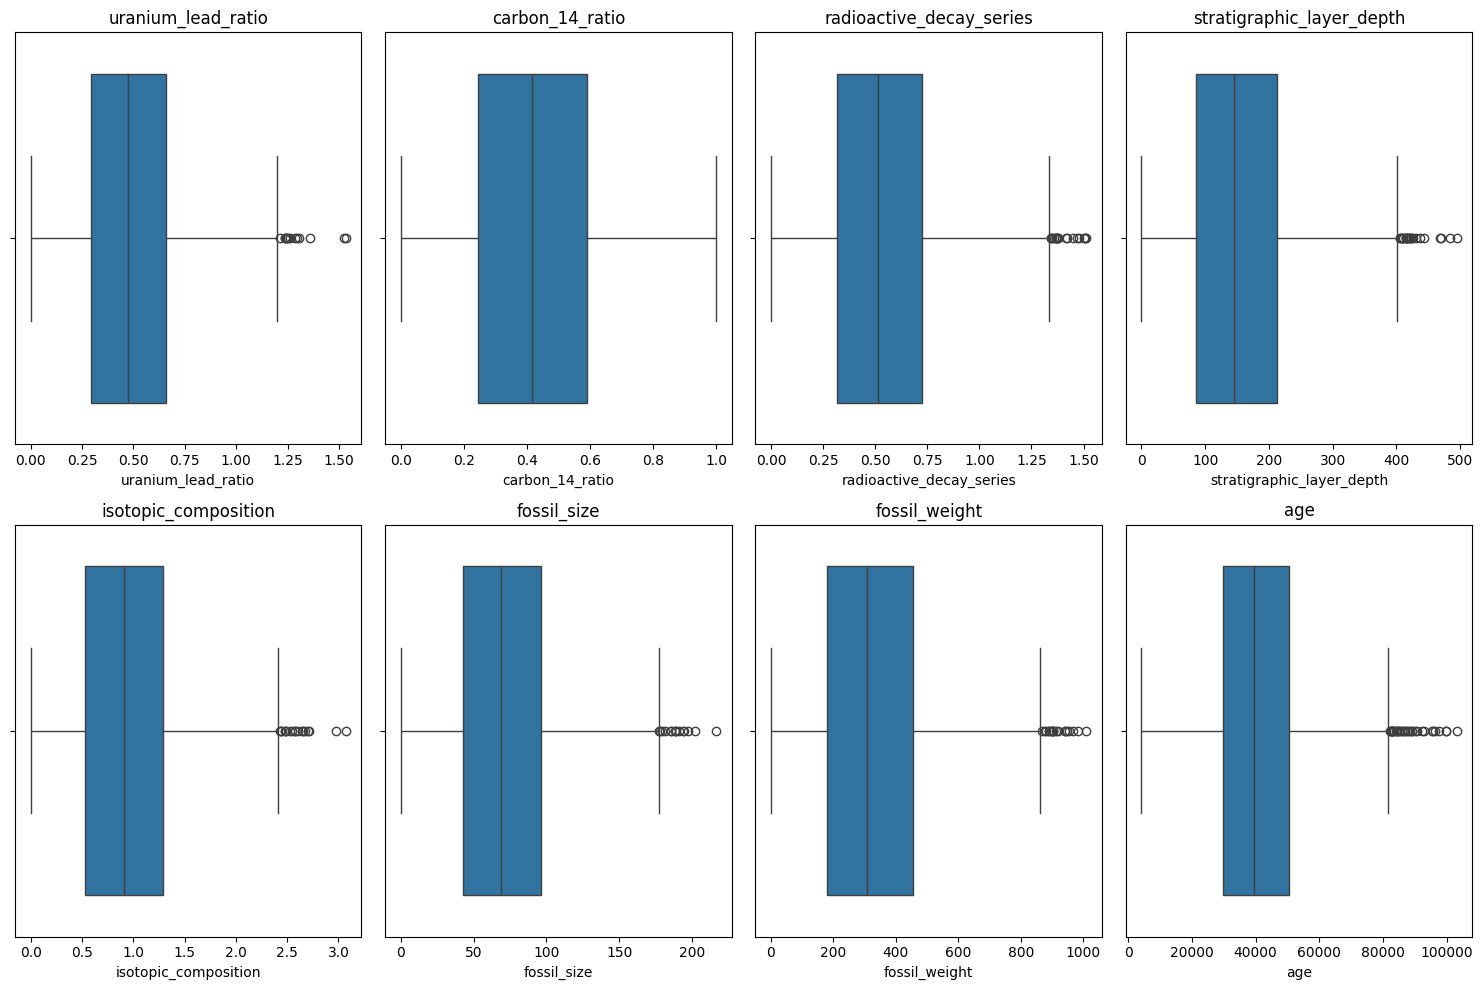

In [9]:
create_boxplots(df)

In [10]:
# Tampilkan
print("Jumlah Outlier pada semua kolom numerikal")
for column in kolom_numerikal:
    outliers = deteksi_outlier(df, column)
    print(f"{column}: {outliers.shape[0]}")

Jumlah Outlier pada semua kolom numerikal
uranium_lead_ratio: 13
carbon_14_ratio: 0
radioactive_decay_series: 19
stratigraphic_layer_depth: 23
isotopic_composition: 18
fossil_size: 15
fossil_weight: 19
age: 33


Disini terdeteksi beberapa outlier pada kolom numerikal, kita tidak bisa mengabaikannya karena outlier sangat berdampak signifikan pada perfomansi model yang akan dibuat

**ATASI OUTLIER PADA FITUR TARGET**

Pertama-tama kita akan fokus ke fitur target yaitu age

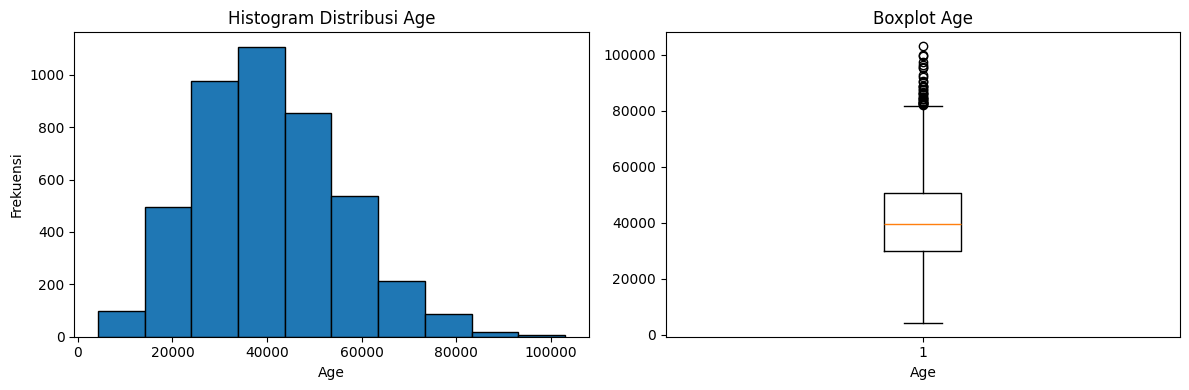

In [11]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['age'], edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frekuensi')
plt.title('Histogram Distribusi Age')

plt.subplot(1, 2, 2)
plt.boxplot(df['age'])
plt.xlabel('Age')
plt.ylabel('')
plt.title('Boxplot Age')

plt.tight_layout()
plt.show()

**ANALISIS** 🕵

Ada beberapa proses handling outlier yang bisa kita gunakan, yaitu :

- Menghapus Outlier
- Transform data (Ubah Skala Data)
- Cap/Floor (Pembatasan Nilai)
- Imputation (Mengganti Nilai)

Jika dilihat, ternyata kolom target distribusi targetnya cenderung mendekati normal dan skala datanya sangat tinggi sekali dibandingkan fitur-fitur lainnya. Maka disini kita akan menggunakan metode Transform Data yaitu mengubah skala datanya.

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Simpan nilai min dan max asli
min_age = df['age'].min()
max_age = df['age'].max()

# Membuat objek MinMaxScaler
scaler = MinMaxScaler()

# Melakukan fit dan transform pada kolom 'age'
df['age'] = scaler.fit_transform(df[['age']])

In [13]:
min_age

np.int64(4208)

In [14]:
max_age

np.int64(103079)

**ATASI OUTLIER PADA FITUR LAINNYA**

Selanjutnya adalah menangani outlier pada fitur-fitur selain target

In [15]:
# Lakukan Cap Floor pada semua kolom
df = cap_floor_all_columns(df)

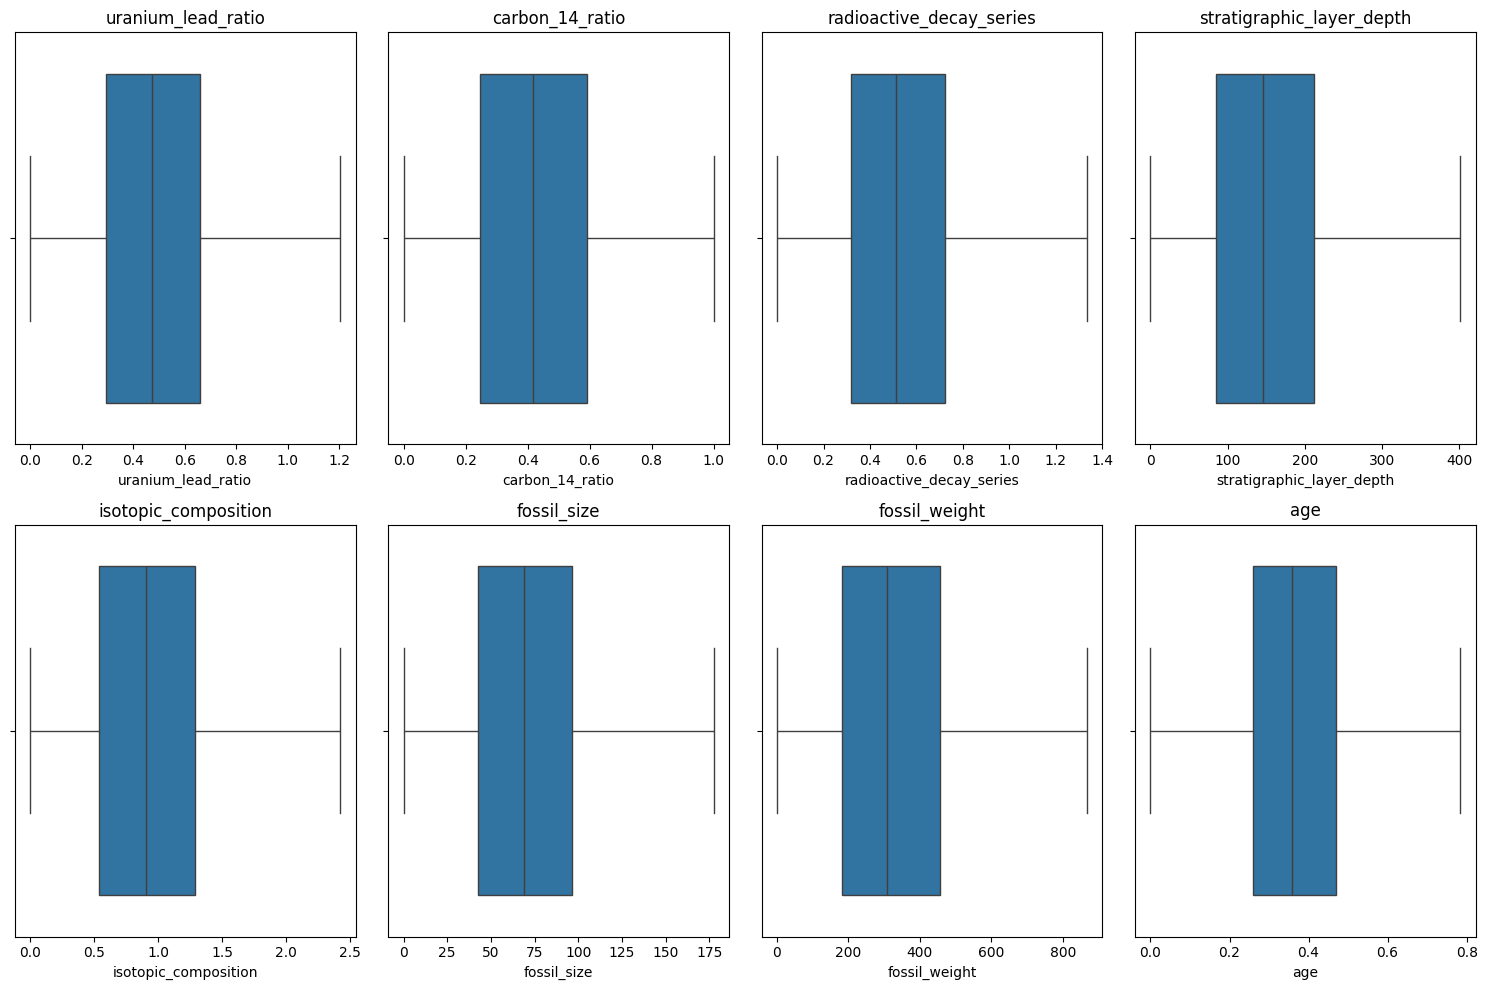

In [16]:
create_boxplots(df)

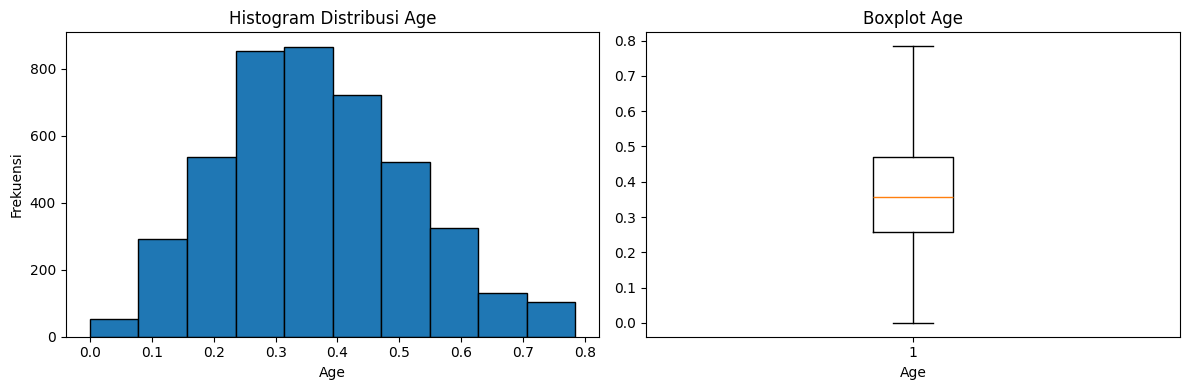

In [17]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['age'], edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frekuensi')
plt.title('Histogram Distribusi Age')

plt.subplot(1, 2, 2)
plt.boxplot(df['age'])
plt.xlabel('Age')
plt.ylabel('')
plt.title('Boxplot Age')

plt.tight_layout()
plt.show()

# **➥ DATA PREPROCESSING**

## ♢ **ENCODING**

Lakukan encoding pada kolom kategorikal (object)

In [18]:
# Encoding Label Menggunakan Label Encoder
le = LabelEncoder()
df['geological_period'] = le.fit_transform(df['geological_period'])
df['paleomagnetic_data'] = le.fit_transform(df['paleomagnetic_data'])
df['surrounding_rock_type'] = le.fit_transform(df['surrounding_rock_type'])
df['inclusion_of_other_fossils'] = le.fit_transform(df['inclusion_of_other_fossils'])
df['stratigraphic_position'] = le.fit_transform(df['stratigraphic_position'])

## ♢ **KORELASI**

Cek Korelasi untuk mengecek relevansi fitur-fitur kolom yang ada dengan target

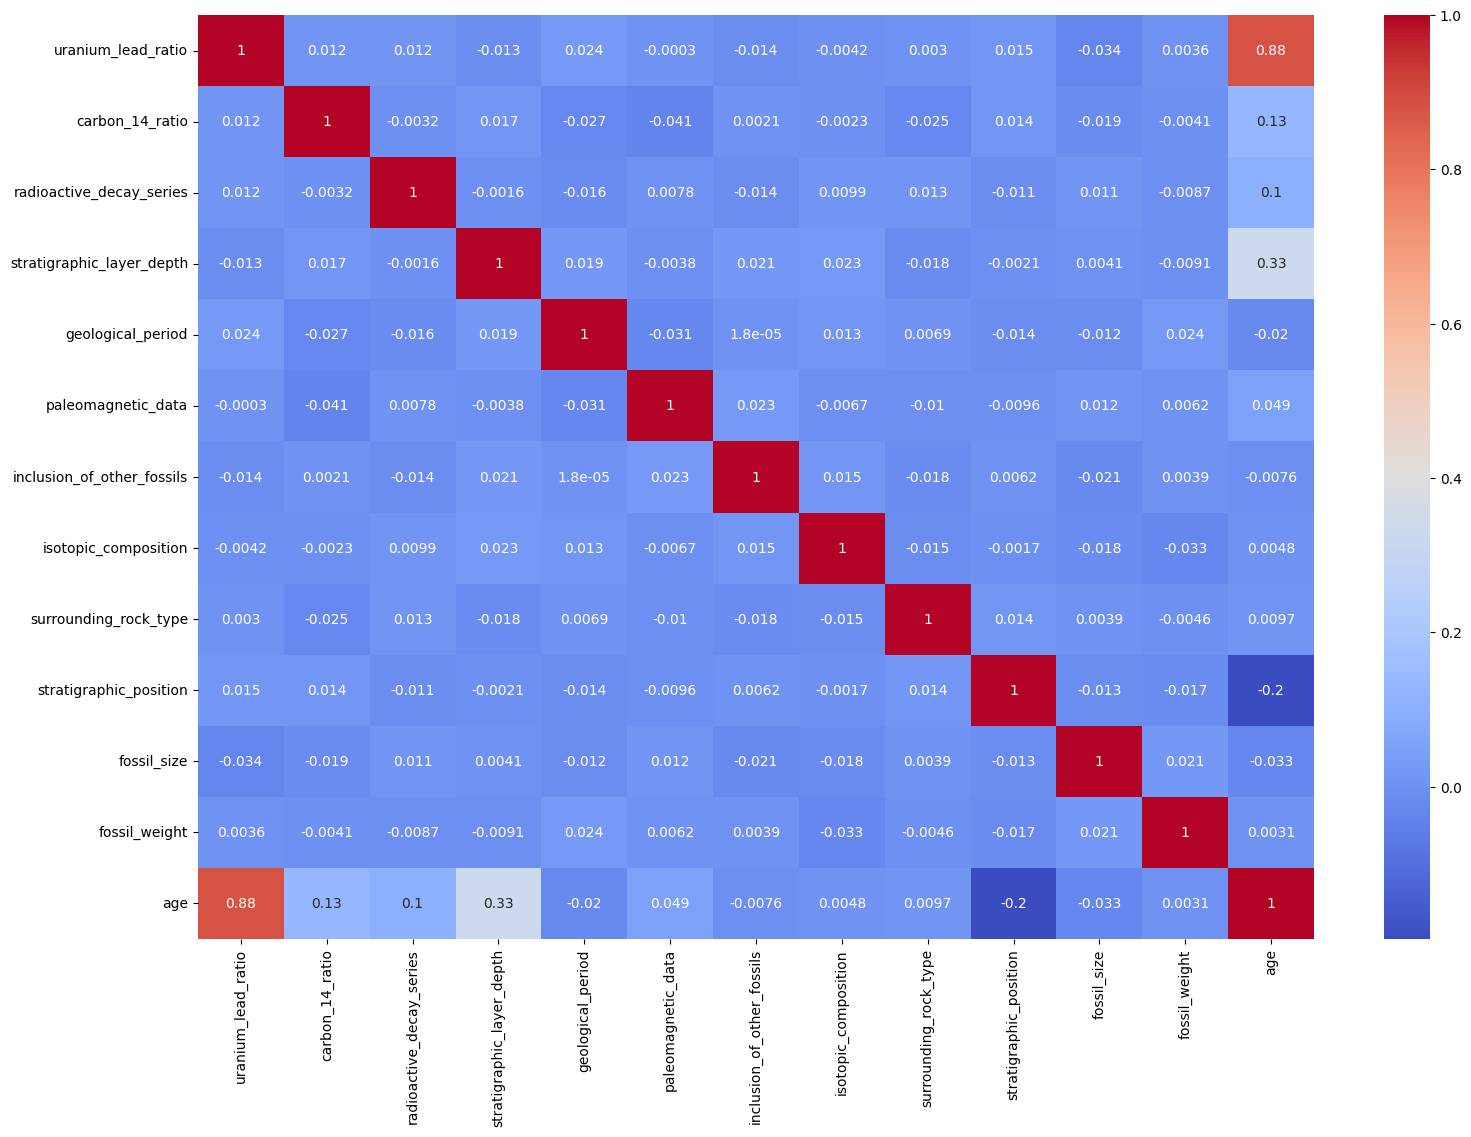

In [19]:
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

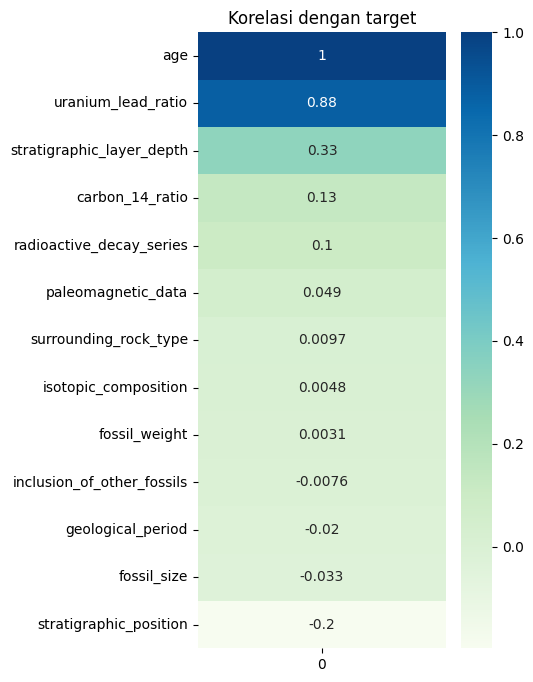

In [20]:
# Buat korelasi matrix target
corr_with_target = df.corrwith(df['age'])

# Sorting Fitur
corr_with_target = corr_with_target.sort_values(ascending=False)

# Heatmap
plt.figure(figsize=(4, 8))
sns.heatmap(corr_with_target.to_frame(), cmap='GnBu', annot=True)
plt.title('Korelasi dengan target')
plt.show()

**ANALISIS** 🕵

Setelah dilakukan banyak percobaan, meskipun saya mencoba hapus salah satu kolom yang ada, perfoma dari model malah menurun. Oleh karena itu disini saya akan membiarkan semua kolom tetap utuh dengan asumsi bahwa semua kolom memang relevan dengan fitur target

# **➥ MODELLING**

## ♢ **SPLITTING DATA**

In [21]:
# Pisahkan variabel fitur dengan variabel target
X = df.drop(columns = ['age'], axis=1)
Y = df['age']

# Pisahkan data menjadi train dan test (Test = 20 %, Train = 80 %)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [22]:
# Ubah ke Numpy Array
X_train = X_train.values
X_test = X_test.values

## ♢ **MODEL YANG AKAN DIGUNAKAN**

List Model yang akan saya gunakan adalah :
* Ridge Regression (Modifikasi dari Linear Regression)
* XGBRegression
* Random Forest
* Gradient Boosting
* Bagging Regressor

## ♢ **OPTIMISASI MODEL**

Disini saya akan melakukan optimisasi model dengan menggunakan random search untuk mendapatkan hyperparameter terbaik untuk dimasukkan pada setiap model machine learning yang akan saya gunakan

In [23]:
# Ridge (Modifikasi dari Linear Regression untuk cegah overfitting)
R = Ridge()
params_R = {
    'alpha': [0.1, 1.0, 10.0]
}

# XGBR
XGB = XGBRegressor()
params_XGB = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 5, 7, 9],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [0, 0.1, 0.2],
    'random_state': [42]
}

# Random Forest
RF = RandomForestRegressor()
params_RF = {
    'n_estimators': [100, 200, 500],
    'max_depth': [2, 5, 7, 9],
    'random_state': [42]
}

# Gradient Boosting
GB = GradientBoostingRegressor()
params_GB = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 5, 7, 9],
    'random_state': [42]
}

# Bagging Regressor
BR = BaggingRegressor()
params_BR = {
    'n_estimators': [100, 200, 500],
    'max_samples': [0.8, 0.9, 1.0],
    'max_features': [0.8, 0.9, 1.0],
    'random_state': [42]
}

# Random Search untuk mendapatkan best params
random_search_R = RandomizedSearchCV(estimator=R, param_distributions=params_R, n_iter=3, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search_XGB = RandomizedSearchCV(estimator=XGB, param_distributions=params_XGB, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search_RF = RandomizedSearchCV(estimator=RF, param_distributions=params_RF, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search_GB = RandomizedSearchCV(estimator=GB, param_distributions=params_GB, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search_BR = RandomizedSearchCV(estimator=BR, param_distributions=params_BR, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

## ♢ **TRAIN MODEL**

Disini kita akan melatih model kita berdasarkan hasil RandomSearch yang telah dilakukan

In [24]:
random_search_R.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=3,
                   param_distributions={'alpha': [0.1, 1.0, 10.0]},
                   random_state=42, scoring='neg_mean_squared_error')

In [25]:
random_search_XGB.fit(X_train, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [2, 5, 7, 9],
                                        'n_estimators': [50, 100, 200],
                                        'random_state': [42],
                                        'reg_alpha': [0, 0.1, 0.2],
                                        'reg_lambda': [0, 0.1, 0.2]},
                   random_state=42, scoring='neg_mean_squared_error')

In [26]:
random_search_RF.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [2, 5, 7, 9],
                                        'n_estimators': [100, 200, 500],
                                        'random_state': [42]},
                   random_state=42, scoring='neg_mean_squared_error')

In [27]:
random_search_GB.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [2, 5, 7, 9],
                                        'n_estimators': [100, 200, 500],
                                        'random_state': [42]},
                   random_state=42, scoring='neg_mean_squared_error')

In [28]:
random_search_BR.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=BaggingRegressor(),
                   param_distributions={'max_features': [0.8, 0.9, 1.0],
                                        'max_samples': [0.8, 0.9, 1.0],
                                        'n_estimators': [100, 200, 500],
                                        'random_state': [42]},
                   random_state=42, scoring='neg_mean_squared_error')

## ♢ **EVALUASI MODEL**

Berikut merupakan hasil evaluasi matrix dari semua model diatas

### • **Ridge Regression**

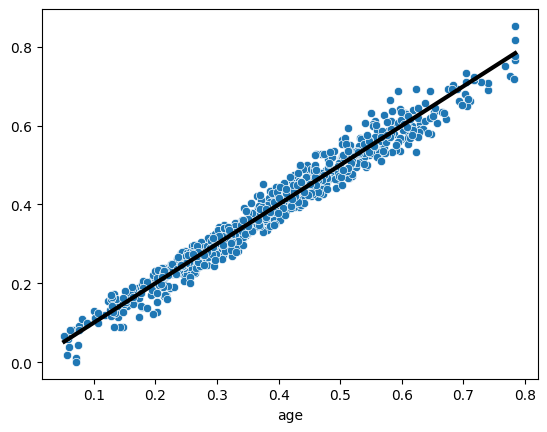

EVALUASI TEST
MAE: 0.020039883981703435
MSE: 0.0006698711681541183
RMSE: 0.025881869487232145
R2: 0.9702861135222683

PERBANDINGAN TRAIN DAN TEST


,Train,Test
Matrix,,
MAE,0.020016,0.020040
MSE,0.000665,0.000670
RMSE,0.025779,0.025882
R2,0.971441,0.970286


In [29]:
# Dapatkan Best Parameter
best_params_R = random_search_R.best_params_
best_model_R = random_search_R.best_estimator_

# Prediksi Model
Y_pred_train = best_model_R.predict(X_train)
Y_pred_test = best_model_R.predict(X_test)

# ScatterPlot
sns.scatterplot(x=Y_test, y=Y_pred_test)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k-', lw=3)
plt.show()

# Evaluasi
print('EVALUASI TEST')
print('MAE:', MAE(Y_test, Y_pred_test))
print('MSE:', MSE(Y_test, Y_pred_test))
print('RMSE:', RMSE(Y_test, Y_pred_test))
print('R2:', R2(Y_test, Y_pred_test))

# Perbandingan Test dan Train
print('\nPERBANDINGAN TRAIN DAN TEST')
scores_df(Y_test, Y_train, Y_pred_test, Y_pred_train)

### • **XGB Regressor**

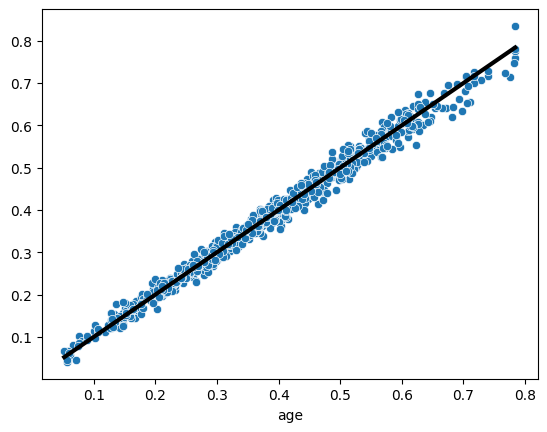

EVALUASI TEST
MAE: 0.01297601807830325
MSE: 0.0002847590507555763
RMSE: 0.01687480520644835
R2: 0.9873687680409151

PERBANDINGAN TRAIN DAN TEST


,Train,Test
Matrix,,
MAE,0.011278,0.012976
MSE,0.000210,0.000285
RMSE,0.014492,0.016875
R2,0.990974,0.987369


In [30]:
# Dapatkan Best Parameter
best_params_XGB = random_search_XGB.best_params_
best_model_XGB = random_search_XGB.best_estimator_

# Prediksi Model
Y_pred_train = best_model_XGB.predict(X_train)
Y_pred_test = best_model_XGB.predict(X_test)

# ScatterPlot
sns.scatterplot(x=Y_test, y=Y_pred_test)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k-', lw=3)
plt.show()

# Evaluasi
print('EVALUASI TEST')
print('MAE:', MAE(Y_test, Y_pred_test))
print('MSE:', MSE(Y_test, Y_pred_test))
print('RMSE:', RMSE(Y_test, Y_pred_test))
print('R2:', R2(Y_test, Y_pred_test))

# Perbandingan Test dan Train
print('\nPERBANDINGAN TRAIN DAN TEST')
scores_df(Y_test, Y_train, Y_pred_test, Y_pred_train)

### • **Random Forest Regressor**

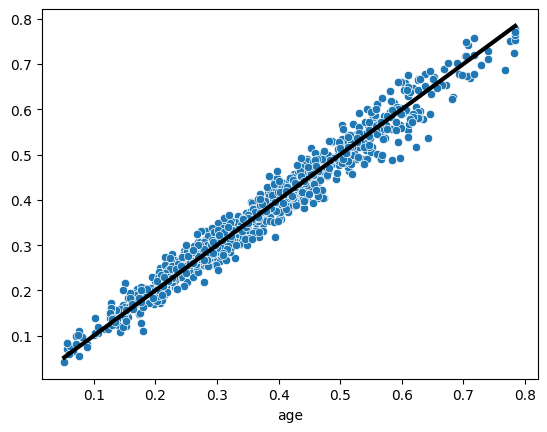

EVALUASI TEST
MAE: 0.021573879488629405
MSE: 0.0007483864811399794
RMSE: 0.027356653324922247
R2: 0.9668033616025907

PERBANDINGAN TRAIN DAN TEST


,Train,Test
Matrix,,
MAE,0.012569,0.021574
MSE,0.000248,0.000748
RMSE,0.015753,0.027357
R2,0.989336,0.966803


In [31]:
# Dapatkan Best Parameter
best_params_RF = random_search_RF.best_params_
best_model_RF = random_search_RF.best_estimator_

# Prediksi Model
Y_pred_train = best_model_RF.predict(X_train)
Y_pred_test = best_model_RF.predict(X_test)

# ScatterPlot
sns.scatterplot(x=Y_test, y=Y_pred_test)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k-', lw=3)
plt.show()

# Evaluasi
print('EVALUASI TEST')
print('MAE:', MAE(Y_test, Y_pred_test))
print('MSE:', MSE(Y_test, Y_pred_test))
print('RMSE:', RMSE(Y_test, Y_pred_test))
print('R2:', R2(Y_test, Y_pred_test))

# Perbandingan Test dan Train
print('\nPERBANDINGAN TRAIN DAN TEST')
scores_df(Y_test, Y_train, Y_pred_test, Y_pred_train)

### • **Gradient Boosting Regressor** 🌟

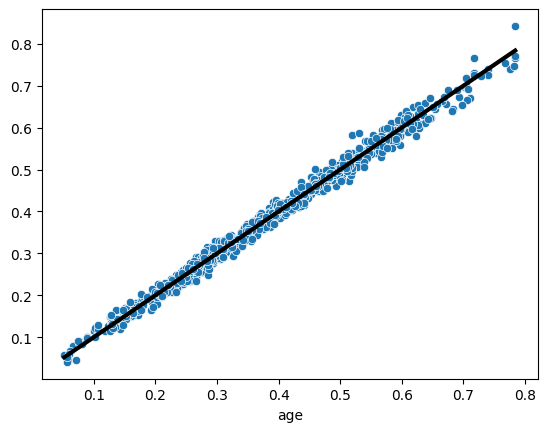

EVALUASI TEST
MAE: 0.011171092341639965
MSE: 0.00020294900224088598
RMSE: 0.014246017065863918
R2: 0.9909976665662864

PERBANDINGAN TRAIN DAN TEST


,Train,Test
Matrix,,
MAE,0.008510,0.011171
MSE,0.000113,0.000203
RMSE,0.010616,0.014246
R2,0.995157,0.990998


In [32]:
# Dapatkan Best Parameter
best_params_GB = random_search_GB.best_params_
best_model_GB = random_search_GB.best_estimator_

# Prediksi Model
Y_pred_train = best_model_GB.predict(X_train)
Y_pred_test = best_model_GB.predict(X_test)

# ScatterPlot
sns.scatterplot(x=Y_test, y=Y_pred_test)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k-', lw=3)
plt.show()

# Evaluasi
print('EVALUASI TEST')
print('MAE:', MAE(Y_test, Y_pred_test))
print('MSE:', MSE(Y_test, Y_pred_test))
print('RMSE:', RMSE(Y_test, Y_pred_test))
print('R2:', R2(Y_test, Y_pred_test))

# Perbandingan Test dan Train
print('\nPERBANDINGAN TRAIN DAN TEST')
scores_df(Y_test, Y_train, Y_pred_test, Y_pred_train)

### • **Bagging Regressor**

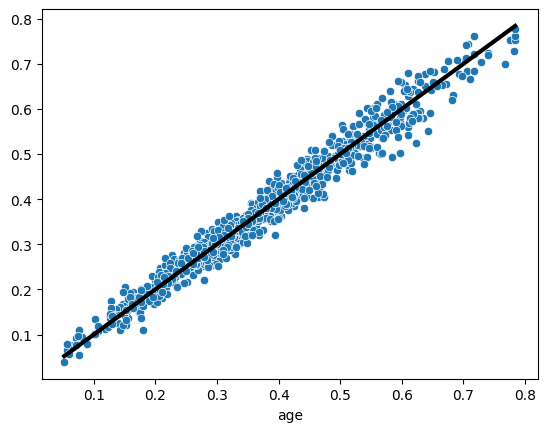

EVALUASI TEST
MAE: 0.02016841940968075
MSE: 0.0006587752384415199
RMSE: 0.02566661719902956
R2: 0.9707783024856381

PERBANDINGAN TRAIN DAN TEST


,Train,Test
Matrix,,
MAE,0.007429,0.020168
MSE,0.000093,0.000659
RMSE,0.009666,0.025667
R2,0.995985,0.970778


In [33]:
# Dapatkan Best Parameter
best_params_BR = random_search_BR.best_params_
best_model_BR = random_search_BR.best_estimator_

# Prediksi Model
Y_pred_train = best_model_BR.predict(X_train)
Y_pred_test = best_model_BR.predict(X_test)

# ScatterPlot
sns.scatterplot(x=Y_test, y=Y_pred_test)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k-', lw=3)
plt.show()

# Evaluasi
print('EVALUASI TEST')
print('MAE:', MAE(Y_test, Y_pred_test))
print('MSE:', MSE(Y_test, Y_pred_test))
print('RMSE:', RMSE(Y_test, Y_pred_test))
print('R2:', R2(Y_test, Y_pred_test))

# Perbandingan Test dan Train
print('\nPERBANDINGAN TRAIN DAN TEST')
scores_df(Y_test, Y_train, Y_pred_test, Y_pred_train)

## ♢ **EVALUASI AKHIR**

Berdasarkan semua hasil model yang telah dilakukan, maka setelah dilakukan semua percobaan dan analisis. Disini saya akhirnya memutuskan untuk menggunakan model dengan nilai terbaik yaitu ada pada

* Gradient Boosting Regressor

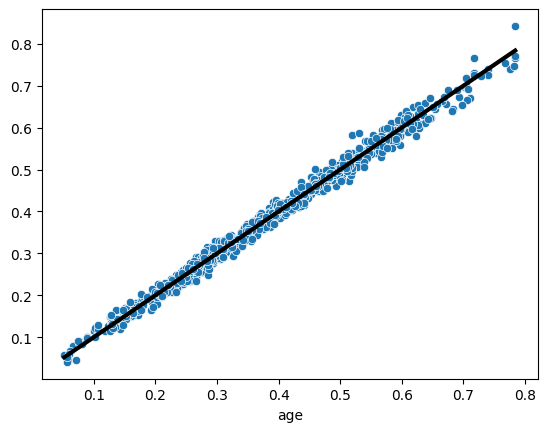

Param yang digunakan :
{'random_state': 42, 'n_estimators': 500, 'max_depth': 2, 'learning_rate': 0.2}

EVALUASI TEST
MAE: 0.011171092341639965
MSE: 0.00020294900224088598
RMSE: 0.014246017065863918
R2: 0.9909976665662864

PERBANDINGAN TRAIN DAN TEST


,Train,Test
Matrix,,
MAE,0.008510,0.011171
MSE,0.000113,0.000203
RMSE,0.010616,0.014246
R2,0.995157,0.990998


In [34]:
# Dapatkan Best Parameter
best_params_GB = random_search_GB.best_params_
best_model_GB = random_search_GB.best_estimator_

# Prediksi Model
Y_pred_train = best_model_GB.predict(X_train)
Y_pred_test = best_model_GB.predict(X_test)

# ScatterPlot
sns.scatterplot(x=Y_test, y=Y_pred_test)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k-', lw=3)
plt.show()

print('Param yang digunakan :')
print(best_params_GB)

# Evaluasi
print('\nEVALUASI TEST')
print('MAE:', MAE(Y_test, Y_pred_test))
print('MSE:', MSE(Y_test, Y_pred_test))
print('RMSE:', RMSE(Y_test, Y_pred_test))
print('R2:', R2(Y_test, Y_pred_test))

# Perbandingan Test dan Train
print('\nPERBANDINGAN TRAIN DAN TEST')
scores_df(Y_test, Y_train, Y_pred_test, Y_pred_train)

# **➥ PIPELINE**

Disini kita akan membuat sebuah pipeline berdasarkan hasil evaluasi model kita

In [35]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(best_model_GB)

In [36]:
import pickle

with open("fossil.pkl", "wb") as model_file:
    pickle.dump(best_model_GB, model_file)

In [37]:
df.head()

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,age
0,0.738061,0.487707,0.907884,91.17,2,0,0,0.915951,0,1,50.65,432.00,0.397639
1,0.560096,0.341738,1.121302,165.44,0,0,0,0.803968,1,2,48.85,353.29,0.403597
2,0.424773,0.218493,0.103855,218.98,0,0,1,0.792441,3,0,37.66,371.33,0.397204
3,0.349958,0.704649,0.383617,51.09,8,0,1,0.074636,1,0,39.10,232.84,0.263171
4,0.886811,0.777494,0.593254,313.72,3,0,1,1.646640,3,2,90.84,277.67,0.637285


In [38]:
# Inference Data
new_data = [0.886811, 0.777494, 0.593254, 313.72, 3, 0, 1, 1.646640, 3, 2, 90.84, 277.67]

best_model_GB.predict([new_data])

array([0.63427677])

In [39]:
import pickle

with open("fossil.pkl", "rb") as model_file:
    model = pickle.load(model_file)

In [40]:
df.head()

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,age
0,0.738061,0.487707,0.907884,91.17,2,0,0,0.915951,0,1,50.65,432.00,0.397639
1,0.560096,0.341738,1.121302,165.44,0,0,0,0.803968,1,2,48.85,353.29,0.403597
2,0.424773,0.218493,0.103855,218.98,0,0,1,0.792441,3,0,37.66,371.33,0.397204
3,0.349958,0.704649,0.383617,51.09,8,0,1,0.074636,1,0,39.10,232.84,0.263171
4,0.886811,0.777494,0.593254,313.72,3,0,1,1.646640,3,2,90.84,277.67,0.637285


In [45]:
# Assuming you have a DataFrame named 'df'
df.to_csv('Dataset_Final/Age _Fossil_modified.csv', index=False)

In [46]:
df

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,age
0,0.738061,0.487707,0.907884,91.17000,2,0,0,0.915951,0,1,50.65,432.00,0.397639
1,0.560096,0.341738,1.121302,165.44000,0,0,0,0.803968,1,2,48.85,353.29,0.403597
2,0.424773,0.218493,0.103855,218.98000,0,0,1,0.792441,3,0,37.66,371.33,0.397204
3,0.349958,0.704649,0.383617,51.09000,8,0,1,0.074636,1,0,39.10,232.84,0.263171
4,0.886811,0.777494,0.593254,313.72000,3,0,1,1.646640,3,2,90.84,277.67,0.637285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4393,0.049660,0.601750,0.762490,222.54000,4,1,1,2.247495,2,0,91.69,415.13,0.226538
4394,0.360085,0.215033,1.002406,276.70000,2,1,1,1.004584,0,0,68.97,121.10,0.411061
4395,0.464864,0.553313,0.659639,76.77000,3,0,1,0.721947,0,1,11.37,288.73,0.282975
4396,0.803338,0.272392,0.123562,204.82000,5,1,1,1.496427,2,0,132.34,518.31,0.563158


In [42]:
# Inference Data
new_data = [0.886811, 0.777494, 0.593254, 313.72, 3, 0, 1, 1.646640, 3, 2, 90.84, 277.67]

hasil = model.predict([new_data])
hasil

array([0.63427677])

In [43]:
# Mengembalikan ke bentuk asli
hasil_asli = hasil * (max_age - min_age) + min_age

In [44]:
hasil_asli

array([66919.57810537])